<p align="center">
  <img src="resources/bigdive.png" alt="BDINTESA"/>
</p>

# TITOLO PROGETTO

## SOTTOTITOLO (opzionale)

- Partecipante 1
- Partecipante 2
- Partecipante 3

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
dtypes = {"COD_SAE":str, "DAT_COSTITUZIONE":str}

In [4]:
train_data = pd.read_csv("/home/bigdive/Desktop/BDINTESA/project_work/CONTEST_TRAINING_SET_PUBBLICO.CSV", dtype = dtypes) #leggo i dati che sono nella medesima cartella

In [5]:
#train_data.head(20)

In [6]:
#(train_data == 0).sum()

In [7]:
mask = [~train_data.ix[i].isnull().any() for i in range(len(train_data))]

In [8]:
print 'all', sum(train_data['FLG_DEF_6M'])*1.0/len(train_data)
print 'cleaned', sum(train_data['FLG_DEF_6M'][mask])*1.0/len(train_data[mask])
print 'nans', sum(train_data['FLG_DEF_6M'][np.invert(mask)])*1.0/len(train_data[np.invert(mask)])
print sum(mask)*1.0/len(mask)

all 0.165571537621
cleaned 0.138160834677
nans 0.257528353539
0.770367155109


In [9]:
test_data = pd.read_csv("/home/bigdive/Desktop/BDINTESA/project_work/CONTEST_TEST_SET_PUBBLICO.csv", dtype = dtypes)

In [10]:
sol_data = pd.read_csv("/home/bigdive/Desktop/BDINTESA/project_work/CONTEST_TEST_RESULTS_AN_PRIVATO.csv")

In [11]:
print "Dimensioni training set:" , shape(train_data)
print "Dimensioni test set:" , shape(test_data)
print "Dimensioni result set:" , shape(sol_data)

Dimensioni training set: (66811, 19)
Dimensioni test set: (7547, 18)
Dimensioni result set: (7547, 2)


In [12]:
#train_data.head() 

In [13]:
#test_data.head() 

In [14]:
#sol_data.head() 

## Preparazione dataset

In [15]:
test_data["FLG_DEF_6M"] = -9999

In [16]:
#test_data.head()

In [17]:
X =train_data["FLG_DEF_6M"]
train_data.drop(labels="FLG_DEF_6M",axis=1,inplace=True)
train_data["FLG_DEF_6M"]=X

In [18]:
#train_data.head()

In [134]:
db = pd.concat([train_data, test_data]).reset_index(drop=True)

In [20]:
#db.head()

In [21]:
#statistica su numero di default

float(train_data["FLG_DEF_6M"].sum())/train_data["FLG_DEF_6M"].count()

#y.value_counts().to_frame('count').assign(percentage = lambda x: x/x.sum())

#hist(float(train_data["FLG_DEF_6M"].sum())/train_data["FLG_DEF_6M"].count())

0.16557153762105042

In [22]:
db.isnull().sum()/db.shape[0]

ID                                   0.000000
COD_CAP                              0.001116
COD_PROVINCIA                        0.043129
DAT_COSTITUZIONE                     0.003429
COD_RAE                              0.000000
COD_SAE                              0.000000
COD_ISTAT_ATECO_07                   0.006321
CBI201312_CREDITI                    0.137860
CBI201312_UTILE_PERDITA_ESERCIZIO    0.191519
CBI201312_PATRIMONIO_NETTO           0.191519
CBI201312_DEBITI_CONSOLIDATI         0.137860
CBI201312_DEBITI_ENTRO_ES_SUCC       0.137860
CBI201312_RICAVI_NETTI               0.191519
CBI201312_ACQUISTI_NETTI             0.191519
CBI201312_COSTI_SERVZ_BENI_TERZI     0.137860
IMP_ACCORDATO                        0.000000
IMP_UTILIZZATO                       0.000000
IMP_VALORE_GARANZIA                  0.000000
FLG_DEF_6M                           0.000000
dtype: float64

In [23]:
sae= db["COD_SAE"].unique()
len(sae)
sae

array(['430', '492', '482', '490', '615', '614', '491', '500', '501',
       '480', '280', '432', '476', '284', '481', '268', '177', '175',
       '759', '551', '450', '288', '259', '178', '263', '273', '258',
       '285', '477'], dtype=object)

### droppiamo via features 

In [135]:
db.drop(labels="COD_PROVINCIA",axis=1,inplace=True) #eliminiamo cod_provincia

In [136]:
db.drop(labels="COD_RAE",axis=1,inplace=True) #eliminiamo cod_rae

In [137]:
db.drop(labels="COD_ISTAT_ATECO_07",axis=1,inplace=True) 

## sistemazione Nan

In [27]:
#db.isnull().sum().sum()

In [28]:
#temp = db

In [29]:
#db = temp

In [138]:
db = db.fillna(0) #sostituisco gli NA con 0

In [32]:
#db.head()

,ID,COD_CAP,DAT_COSTITUZIONE,COD_SAE,CBI201312_CREDITI,CBI201312_UTILE_PERDITA_ESERCIZIO,CBI201312_PATRIMONIO_NETTO,CBI201312_DEBITI_CONSOLIDATI,CBI201312_DEBITI_ENTRO_ES_SUCC,CBI201312_RICAVI_NETTI,CBI201312_ACQUISTI_NETTI,CBI201312_COSTI_SERVZ_BENI_TERZI,IMP_ACCORDATO,IMP_UTILIZZATO,IMP_VALORE_GARANZIA,FLG_DEF_6M
0,1,83013.0,1977.0,430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,135220.0,0.0,1
1,2,84131.0,1984.0,492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,844348.0,1054419.0,0.0,1
2,3,82030.0,1952.0,430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,332366.0,0.0,1
3,4,80133.0,1982.0,430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51762483.0,0.0,1
4,5,72021.0,1989.0,482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37562.0,34857.0,0.0,0


### aggregato cap regione

In [33]:
def cap2reg(cap):
    cap = int(cap)
    if (64010 <= cap) & (cap <= 67100):
        return "Abruzzo"
    elif (75010 <= cap) & (cap <= 85100):
        return "Basilicata"
    elif (87010 <= cap) & (cap <= 89900):
        return "Calabria"
    elif (80010 <= cap) & (cap <= 84135):
        return "Campania"
    elif (29010 <= cap) & (cap <= 48125):
        return "Emilia Romagna"
    elif (33010 <= cap) & (cap <= 34170):
        return "Friuli Venezia Giulia"
    elif (10 <= cap) & (cap <= 4100):
        return "Lazio"
    elif (12071 <= cap) & (cap <= 19137):
        return "Liguria"
    elif (20010 <= cap) & (cap <= 46100):
        return "Lombardia"
    elif (60010 <= cap) & (cap <= 63900):
        return "Marche"
    elif (86010 <= cap) & (cap <= 86170):
        return "Molise"
    elif (10010 <= cap) & (cap <= 28925):
        return "Piemonte"
    elif (70010 <= cap) & (cap <= 76125):
        return "Puglia"
    elif (7010 <= cap) & (cap <= 9170):
        return "Sardegna"
    elif (90010 <= cap) & (cap <= 98168):
        return "Sicilia"
    elif (50012 <= cap) & (cap <= 59100):
        return "Toscana"
    elif (38010 <= cap) & (cap <= 39100):
        return "Trentino Alto Adige"
    elif (5010 <= cap) & (cap <= 6135):
        return "Umbria"
    elif (11010 <= cap) & (cap <= 11100):
        return "Valle D'Aosta"
    elif (30010 <= cap) & (cap <= 45100):
        return "Veneto"
    else:
        return None

In [139]:
db["REGIONE"] = db["COD_CAP"].map(cap2reg, na_action='ignore')
#db.head()

In [140]:
db.drop(labels="COD_CAP", axis=1, inplace=True)

## Creazione csv per data viz

In [146]:
db_n=db[db.FLG_DEF_6M >= 0]
db_n.shape

(66811, 16)

In [141]:
temp = db_n['FLG_DEF_6M']
db_n.drop(labels=['FLG_DEF_6M'],axis=1,inplace = True)
db_n.insert(1,'FLG_DEF_6M',temp)
del temp

In [167]:
temp = db_n['REGIONE']
db_n.drop(labels=['REGIONE'],axis=1,inplace = True)
db_n.insert(2,'REGIONE',temp)
del temp

In [170]:
temp = db_n['COD_SAE']
db_n.drop(labels=['COD_SAE'],axis=1,inplace = True)
db_n.insert(3,'COD_SAE',temp)
del temp

In [171]:
db_n.columns[0],db_n.columns[1],db_n.columns[2],db_n.columns[3]

('ID', 'FLG_DEF_6M', 'REGIONE', 'COD_SAE')

In [173]:
db_n = db_n[db_n.columns[0:4]]
db_n.head()

,ID,FLG_DEF_6M,REGIONE,COD_SAE
0,1,1,Basilicata,430
1,2,1,Basilicata,492
2,3,1,Basilicata,430
3,4,1,Basilicata,430
4,5,0,Puglia,482


In [174]:
db_n.to_csv('db.csv')

## Fine creazione csv per data viz

## creazione dummies

In [38]:
features = ["DAT_COSTITUZIONE", "COD_SAE", "REGIONE"]

In [39]:
%%time
db=pd.concat([db, pd.get_dummies(db[features], columns=features)], axis=1)
db.drop(features, axis=1, inplace=True)

CPU times: user 392 ms, sys: 244 ms, total: 636 ms
Wall time: 658 ms


In [40]:
%%time 
db["FLAG_GARANZIA"]=0
for el in db.IMP_VALORE_GARANZIA:
    if el>0.0:
        db["FLAG_GARANZIA"]=1

CPU times: user 2.64 s, sys: 8 ms, total: 2.65 s
Wall time: 2.7 s


## nuove features

In [41]:
db["IMP_UTILIZZATO/IMP_ACCORDATO"] = db.IMP_UTILIZZATO.div(db.IMP_ACCORDATO)
#db["IMP_UTILIZZATO/IMP_ACCORDATO"] = db.IMP_UTILIZZATO.div(db.IMP_ACCORDATO).replace(inf, 0)

In [54]:
db["IMP_UTILIZZATO/IMP_ACCORDATO"].isnull().sum()*1.0/db.shape[0]

0.0015196750853976708

In [45]:
(db["IMP_UTILIZZATO/IMP_ACCORDATO"] == inf).sum()*1.0/len(db["IMP_UTILIZZATO/IMP_ACCORDATO"])

0.040802603620323299

In [47]:
(db["IMP_UTILIZZATO/IMP_ACCORDATO"] == -inf).sum()*1.0/len(db["IMP_UTILIZZATO/IMP_ACCORDATO"])

0.0

In [ ]:
# decidiamo di mettere uno per quanto sopra

In [56]:
db["IMP_UTILIZZATO/IMP_ACCORDATO"] = db.IMP_UTILIZZATO.div(db.IMP_ACCORDATO).replace(inf, 1).replace(nan,0)

In [ ]:
#andiamo avanti

In [48]:
db["CBI201312_DEBITI_CONSOLIDATI/CBI201312_CREDITI"] = db.CBI201312_DEBITI_CONSOLIDATI.div(db.CBI201312_CREDITI)

In [50]:
(db["CBI201312_DEBITI_CONSOLIDATI/CBI201312_CREDITI"] == inf).sum()*1.0/len(db["CBI201312_DEBITI_CONSOLIDATI/CBI201312_CREDITI"])

0.0088356330186395542

In [53]:
db["CBI201312_DEBITI_CONSOLIDATI/CBI201312_CREDITI"].isnull().sum()*1.0/db.shape[0]

0.16369455875628716

In [59]:
db["CBI201312_DEBITI_CONSOLIDATI/CBI201312_CREDITI"] = db.CBI201312_DEBITI_CONSOLIDATI.div(db.CBI201312_CREDITI).replace(inf, 1).replace(nan,0)

In [ ]:
#avanti

In [60]:
db["CBI201312_DEBITI_ENTRO_ES_SUCC/CBI201312_CREDITI"] = db.CBI201312_DEBITI_ENTRO_ES_SUCC.div(db.CBI201312_CREDITI)

In [61]:
(db["CBI201312_DEBITI_ENTRO_ES_SUCC/CBI201312_CREDITI"] == inf).sum()*1.0/len(db["CBI201312_DEBITI_ENTRO_ES_SUCC/CBI201312_CREDITI"])

0.011269802845692461

In [62]:
db["CBI201312_DEBITI_ENTRO_ES_SUCC/CBI201312_CREDITI"].isnull().sum()*1.0/db.shape[0]

0.16126038892923425

In [63]:
db["CBI201312_DEBITI_ENTRO_ES_SUCC/CBI201312_CREDITI"] = db.CBI201312_DEBITI_ENTRO_ES_SUCC.div(db.CBI201312_CREDITI).replace(inf,1).replace(nan, 0)

In [64]:
#db.isnull().sum().sum()

0

## Spostiamo la variabile target all'inizio

In [73]:
temp = db['FLG_DEF_6M']
db.drop(labels=['FLG_DEF_6M'],axis=1,inplace = True)
db.insert(1,'FLG_DEF_6M',temp)
del temp

In [74]:
db.head()

,ID,FLG_DEF_6M,CBI201312_CREDITI,CBI201312_UTILE_PERDITA_ESERCIZIO,CBI201312_PATRIMONIO_NETTO,CBI201312_DEBITI_CONSOLIDATI,CBI201312_DEBITI_ENTRO_ES_SUCC,CBI201312_RICAVI_NETTI,CBI201312_ACQUISTI_NETTI,CBI201312_COSTI_SERVZ_BENI_TERZI,...,REGIONE_Piemonte,REGIONE_Puglia,REGIONE_Sardegna,REGIONE_Sicilia,REGIONE_Toscana,REGIONE_Umbria,FLAG_GARANZIA,IMP_UTILIZZATO/IMP_ACCORDATO,CBI201312_DEBITI_CONSOLIDATI/CBI201312_CREDITI,CBI201312_DEBITI_ENTRO_ES_SUCC/CBI201312_CREDITI
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1.000000,0.0,0.0
1,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1.248797,0.0,0.0
2,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1.000000,0.0,0.0
3,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1.000000,0.0,0.0
4,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1,0.927986,0.0,0.0


In [75]:
#db.to_csv('db.csv')

## Modello

In [76]:
train = db[db.FLG_DEF_6M >= 0]
train.shape

(66811, 194)

In [77]:
test = db[db.FLG_DEF_6M < 0]
test.shape

(7547, 194)

In [78]:
test.drop(labels="FLG_DEF_6M",axis=1,inplace=True) 
test.shape

/home/bigdive/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


(7547, 193)

In [101]:
test.head()

,ID,CBI201312_CREDITI,CBI201312_UTILE_PERDITA_ESERCIZIO,CBI201312_PATRIMONIO_NETTO,CBI201312_DEBITI_CONSOLIDATI,CBI201312_DEBITI_ENTRO_ES_SUCC,CBI201312_RICAVI_NETTI,CBI201312_ACQUISTI_NETTI,CBI201312_COSTI_SERVZ_BENI_TERZI,IMP_ACCORDATO,...,REGIONE_Piemonte,REGIONE_Puglia,REGIONE_Sardegna,REGIONE_Sicilia,REGIONE_Toscana,REGIONE_Umbria,FLAG_GARANZIA,IMP_UTILIZZATO/IMP_ACCORDATO,CBI201312_DEBITI_CONSOLIDATI/CBI201312_CREDITI,CBI201312_DEBITI_ENTRO_ES_SUCC/CBI201312_CREDITI
66811,66812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59982.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1.000000,0.000000,0.000000
66812,66813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,388785.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1,1.006983,0.000000,0.000000
66813,66814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,213293.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0.991336,0.000000,0.000000
66814,66815,125.0,32.0,-186.0,177.0,351.0,779.0,351.0,256.0,437243.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0.856588,1.416000,2.808000
66815,66816,51.0,74.0,-17.0,447.0,26.0,407.0,122.0,19.0,620000.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1,0.000000,8.764706,0.509804


In [103]:
test.drop(labels="ID",axis=1,inplace=True) 

/home/bigdive/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [104]:
X = train[train.columns[2:]] #tolgo id e defaults
shape(X)

(66811, 192)

In [105]:
X.head()

,CBI201312_CREDITI,CBI201312_UTILE_PERDITA_ESERCIZIO,CBI201312_PATRIMONIO_NETTO,CBI201312_DEBITI_CONSOLIDATI,CBI201312_DEBITI_ENTRO_ES_SUCC,CBI201312_RICAVI_NETTI,CBI201312_ACQUISTI_NETTI,CBI201312_COSTI_SERVZ_BENI_TERZI,IMP_ACCORDATO,IMP_UTILIZZATO,...,REGIONE_Piemonte,REGIONE_Puglia,REGIONE_Sardegna,REGIONE_Sicilia,REGIONE_Toscana,REGIONE_Umbria,FLAG_GARANZIA,IMP_UTILIZZATO/IMP_ACCORDATO,CBI201312_DEBITI_CONSOLIDATI/CBI201312_CREDITI,CBI201312_DEBITI_ENTRO_ES_SUCC/CBI201312_CREDITI
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,135220.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,844348.0,1054419.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1.248797,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,332366.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51762483.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37562.0,34857.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1,0.927986,0.0,0.0


In [106]:
y = train["FLG_DEF_6M"]
#y

In [107]:
#from sklearn.cross_validation import train_test_split

In [108]:
#X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state = 42)

In [199]:
%%time
from sklearn import ensemble

model = ensemble.RandomForestClassifier(n_estimators=500, random_state=15)
model.fit(X, y)

#plot_decision_boundary(model, X_train)

# plot the dataset points
#scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, s=50)

CPU times: user 2min 38s, sys: 512 ms, total: 2min 38s
Wall time: 2min 40s


In [110]:
from sklearn import metrics

In [111]:
type(ravel(sol_data))

numpy.ndarray

In [112]:
shape(test)

(7547, 192)

In [113]:
shape(X)

(66811, 192)

In [119]:
y_true = ravel(sol_data["FLG_DEF_6M"])

shape(sol_data)



(7547, 2)

AUC: 0.89518042918


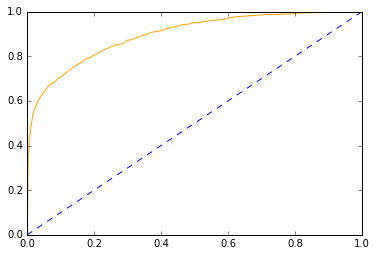

In [201]:
y_pred = model.predict_proba(test)
fpr, tpr, _ = metrics.roc_curve(ravel(sol_data["FLG_DEF_6M"]) , y_pred[:,1])
print "AUC:", metrics.auc(fpr, tpr)
plot ([0,1] , [0,1],"--",fpr,tpr,"orange")
show()

In [202]:
y_pred_1_e_0 = model.predict(test)

In [191]:
pd.options.display.max_rows = 500

In [194]:
pd.DataFrame([y_pred[:,1],y_pred_1_e_0]).T

,0,1
0,0.165,0.0
1,0.195,0.0
2,0.240,0.0
3,0.060,0.0
4,0.050,0.0
5,0.075,0.0
6,0.115,0.0
7,0.000,0.0
8,0.025,0.0
9,0.025,0.0


In [ ]:
# AUC: 0.871034764006 (con -999999)
# AUC: 0.873450448055 (con 0)
# AUC: 0.873392986888 (con medie)
# AUC: 0.872525509275(con mediane)

In [ ]:
#scegliamo lo 0!

In [226]:
db.head()

,ID,CBI201312_CREDITI,CBI201312_UTILE_PERDITA_ESERCIZIO,CBI201312_PATRIMONIO_NETTO,CBI201312_DEBITI_CONSOLIDATI,CBI201312_DEBITI_ENTRO_ES_SUCC,CBI201312_RICAVI_NETTI,CBI201312_ACQUISTI_NETTI,CBI201312_COSTI_SERVZ_BENI_TERZI,IMP_ACCORDATO,...,COD_SAE_482,COD_SAE_490,COD_SAE_491,COD_SAE_492,COD_SAE_500,COD_SAE_501,COD_SAE_551,COD_SAE_614,COD_SAE_615,COD_SAE_759
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,844348.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37562.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Confusion Matrix

In [123]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

In [195]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_true, y_pred_1_e_0)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

NameError: name 'class_names' is not defined

In [203]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred_1_e_0)

array([[6154,   82],
       [ 652,  659]])

In [205]:
652+659

1311

In [474]:
#db[db.FLAG_GARANZIA != 0].head()

In [204]:
sol_data['FLG_DEF_6M'].sum()

1311

## creazione variabili

In [475]:
features_to_combine = db[db.columns[1:11]].columns
features_to_combine

Index([u'CBI201312_CREDITI', u'CBI201312_UTILE_PERDITA_ESERCIZIO',
       u'CBI201312_PATRIMONIO_NETTO', u'CBI201312_DEBITI_CONSOLIDATI',
       u'CBI201312_DEBITI_ENTRO_ES_SUCC', u'CBI201312_RICAVI_NETTI',
       u'CBI201312_ACQUISTI_NETTI', u'CBI201312_COSTI_SERVZ_BENI_TERZI',
       u'IMP_ACCORDATO', u'IMP_UTILIZZATO'],
      dtype='object')

In [476]:
%time
for col1 in features_to_combine:
    for col2 in features_to_combine:
        try:
            if col1!=col2:
                db[col1+'/'+col2]= db[col1].div(db[col2])
            if col2+'*'+col1 not in db.columns:
                db[col1+'*'+col2]= db[col1].mul(db[col2])
        except:
            print ('Something went wrong!')

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.11 µs


In [477]:
db.head()

,ID,CBI201312_CREDITI,CBI201312_UTILE_PERDITA_ESERCIZIO,CBI201312_PATRIMONIO_NETTO,CBI201312_DEBITI_CONSOLIDATI,CBI201312_DEBITI_ENTRO_ES_SUCC,CBI201312_RICAVI_NETTI,CBI201312_ACQUISTI_NETTI,CBI201312_COSTI_SERVZ_BENI_TERZI,IMP_ACCORDATO,...,IMP_UTILIZZATO/CBI201312_CREDITI,IMP_UTILIZZATO/CBI201312_UTILE_PERDITA_ESERCIZIO,IMP_UTILIZZATO/CBI201312_PATRIMONIO_NETTO,IMP_UTILIZZATO/CBI201312_DEBITI_CONSOLIDATI,IMP_UTILIZZATO/CBI201312_DEBITI_ENTRO_ES_SUCC,IMP_UTILIZZATO/CBI201312_RICAVI_NETTI,IMP_UTILIZZATO/CBI201312_ACQUISTI_NETTI,IMP_UTILIZZATO/CBI201312_COSTI_SERVZ_BENI_TERZI,IMP_UTILIZZATO/IMP_ACCORDATO,IMP_UTILIZZATO*IMP_UTILIZZATO
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,1.828445e+10
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,844348.0,...,inf,inf,inf,inf,inf,inf,inf,inf,1.248797,1.111799e+12
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,1.104672e+11
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,2.679355e+15
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37562.0,...,inf,inf,inf,inf,inf,inf,inf,inf,0.927986,1.215010e+09


In [478]:
db.isnull().sum()/db.shape[0]

ID                                                                   0.000000
CBI201312_CREDITI                                                    0.000000
CBI201312_UTILE_PERDITA_ESERCIZIO                                    0.000000
CBI201312_PATRIMONIO_NETTO                                           0.000000
CBI201312_DEBITI_CONSOLIDATI                                         0.000000
CBI201312_DEBITI_ENTRO_ES_SUCC                                       0.000000
CBI201312_RICAVI_NETTI                                               0.000000
CBI201312_ACQUISTI_NETTI                                             0.000000
CBI201312_COSTI_SERVZ_BENI_TERZI                                     0.000000
IMP_ACCORDATO                                                        0.000000
IMP_UTILIZZATO                                                       0.000000
IMP_VALORE_GARANZIA                                                  0.000000
FLG_DEF_6M                                                      

In [484]:
(db == inf).sum()/db.shape[0]

ID                                                                   0.000000
CBI201312_CREDITI                                                    0.000000
CBI201312_UTILE_PERDITA_ESERCIZIO                                    0.000000
CBI201312_PATRIMONIO_NETTO                                           0.000000
CBI201312_DEBITI_CONSOLIDATI                                         0.000000
CBI201312_DEBITI_ENTRO_ES_SUCC                                       0.000000
CBI201312_RICAVI_NETTI                                               0.000000
CBI201312_ACQUISTI_NETTI                                             0.000000
CBI201312_COSTI_SERVZ_BENI_TERZI                                     0.000000
IMP_ACCORDATO                                                        0.000000
IMP_UTILIZZATO                                                       0.000000
IMP_VALORE_GARANZIA                                                  0.000000
FLG_DEF_6M                                                      

In [485]:
(db == -inf).sum()/db.shape[0]

ID                                                                   0.0
CBI201312_CREDITI                                                    0.0
CBI201312_UTILE_PERDITA_ESERCIZIO                                    0.0
CBI201312_PATRIMONIO_NETTO                                           0.0
CBI201312_DEBITI_CONSOLIDATI                                         0.0
CBI201312_DEBITI_ENTRO_ES_SUCC                                       0.0
CBI201312_RICAVI_NETTI                                               0.0
CBI201312_ACQUISTI_NETTI                                             0.0
CBI201312_COSTI_SERVZ_BENI_TERZI                                     0.0
IMP_ACCORDATO                                                        0.0
IMP_UTILIZZATO                                                       0.0
IMP_VALORE_GARANZIA                                                  0.0
FLG_DEF_6M                                                           0.0
DAT_COSTITUZIONE_0                                 

In [487]:
(db == -inf).sum().sum()

13324

In [488]:
db['IMP_ACCORDATO/IMP_UTILIZZATO'].isnull().sum()

113

In [489]:
(db['IMP_ACCORDATO/IMP_UTILIZZATO']==inf).sum()

2654

## classificazione